## **Hand Writting Recongnition Using Keras on TensorFlow**




In [1]:
import pandas as pd               # Import pandas library
import numpy as np                # Import numpy library
import matplotlib.pyplot as plt   # Import matplotlib library
import tensorflow as tf           # Import tensorflow library
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [2]:
mnist = tf.keras.datasets.mnist # Object of the MNIST dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data() # Load data

11490434/11490434 [==============================] - 1s 0us/step


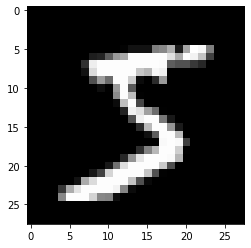

In [3]:
plt.imshow(x_train[0], cmap="gray") # Import the image
plt.show() # Plot the image

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1) # Normalize the training dataset
x_test = tf.keras.utils.normalize(x_test, axis=1) # Normalize the testing dataset

In [5]:
#Build the model object
model = tf.keras.models.Sequential()
# Add the Flatten Layer
model.add(tf.keras.layers.Flatten())
# Build the input and the hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Build the output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [6]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [7]:
max_epochs = 21

import time
time_list = []
accuracy = []
val_accuracy = []


for epoch in range(1, max_epochs):
  start = time.time()
  history = model.fit(x=x_train, y=y_train, epochs=epoch, validation_data=(x_test, y_test))
  end = time.time()
  time_list.append(end-start)
  accuracy.append( sum(history.history['accuracy']) / len(history.history['accuracy']) )
  val_accuracy.append( sum(history.history['val_accuracy']) / len(history.history['val_accuracy']) )

1875/1875 [==============================] - 14s 5ms/step - loss: 0.2630 - accuracy: 0.9225 - val_loss: 0.1407 - val_accuracy: 0.9565
Epoch 1/2
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1071 - accuracy: 0.9671 - val_loss: 0.1075 - val_accuracy: 0.9662
Epoch 2/2
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0749 - accuracy: 0.9763 - val_loss: 0.0877 - val_accuracy: 0.9731
Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0546 - accuracy: 0.9828 - val_loss: 0.0929 - val_accuracy: 0.9715
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0413 - accuracy: 0.9865 - val_loss: 0.0857 - val_accuracy: 0.9739
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0322 - accuracy: 0.9894 - val_loss: 0.0912 - val_accuracy: 0.9738
Epoch 1/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0266 - accuracy: 0.9914 - val_loss: 0.0934 - val_accuracy: 0.9759
Epoch 2/

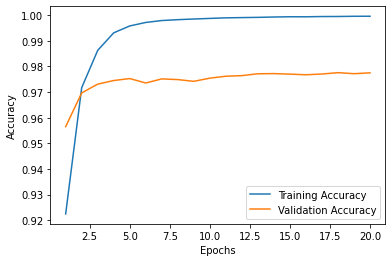

In [8]:
#Plot Accuracy vs Epochs
x = np.arange(1, max_epochs)
plt.plot(x, accuracy, label='Training Accuracy')
plt.plot(x, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

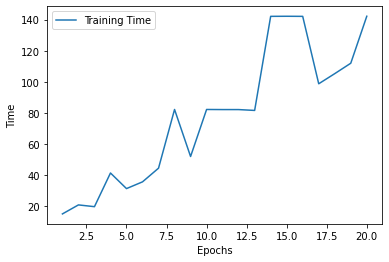

In [9]:
#Plot Training Time vs Epochs
plt.plot(x, time_list, label='Training Time')
plt.xlabel('Epochs')
plt.ylabel('Time')
plt.legend()
plt.show()

## **Linear Regression Using Keras on TensorFlow**



In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv')

In [11]:
petrol_cons=(df-df.mean())/df.std()
petrol_cons.head()
petrol_cons.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,1.40062,-1.169466,-1.028042,-0.817255,-0.319708
1,1.40062,-0.261205,-1.235975,0.030046,-0.471649
2,1.40062,-0.656935,-1.139742,0.174268,-0.140955
3,-0.17705,1.095085,-0.920639,-0.745144,-1.454794
4,0.34884,0.273989,-1.470545,-0.474729,-1.490545


In [12]:
x = petrol_cons.iloc[:, 0:4].values
y = petrol_cons.iloc[:, 4].values

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [14]:
x_test

array([[ 1.35447518, -1.33452296, -0.31161731, -1.48308699],
       [ 0.36314126,  0.15174391, -1.44873146, -0.57895909],
       [ 0.36314126, -1.6194839 , -0.10974518, -0.5080471 ],
       [-0.62819265, -1.26188585,  0.29615525, -1.03988704],
       [ 0.36314126, -2.33654247,  0.19346729,  0.02379284],
       [-0.62819265, -0.78322597,  0.1560037 ,  0.16561682],
       [ 0.36314126, -1.47048471, -0.62291545, -1.58945498],
       [-0.62819265,  0.2448684 , -0.31458205,  0.87473675],
       [ 0.36314126,  1.50577399, -0.98865707, -0.41940711],
       [ 0.36314126,  0.13684399,  0.0357968 , -0.82715107]])

In [15]:
input_layer = Input(shape=(x.shape[1],))
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [16]:
import time
time_list2 = []
mse = []
val_mse = []
max_epochs = 31

for epoch in range(1,max_epochs):
  start = time.time()
  history2 = model.fit(x_train, y_train, epochs=epoch, verbose=1, validation_data=(x_test, y_test))
  end = time.time()
  time_list2.append(end-start)
  mse.append( sum(history2.history['mean_squared_error']) / len(history2.history['mean_squared_error']) )
  val_mse.append( sum(history2.history['val_mean_squared_error']) / len(history2.history['val_mean_squared_error']) )

2/2 [==============================] - 1s 148ms/step - loss: 1.1471 - mean_squared_error: 1.1471 - val_loss: 0.5744 - val_mean_squared_error: 0.5744
Epoch 1/2
2/2 [==============================] - 0s 50ms/step - loss: 1.0076 - mean_squared_error: 1.0076 - val_loss: 0.5406 - val_mean_squared_error: 0.5406
Epoch 2/2
2/2 [==============================] - 0s 26ms/step - loss: 0.9079 - mean_squared_error: 0.9079 - val_loss: 0.5055 - val_mean_squared_error: 0.5055
Epoch 1/3
2/2 [==============================] - 0s 47ms/step - loss: 0.8128 - mean_squared_error: 0.8128 - val_loss: 0.4730 - val_mean_squared_error: 0.4730
Epoch 2/3
2/2 [==============================] - 0s 35ms/step - loss: 0.7343 - mean_squared_error: 0.7343 - val_loss: 0.4453 - val_mean_squared_error: 0.4453
Epoch 3/3
2/2 [==============================] - 0s 30ms/step - loss: 0.6661 - mean_squared_error: 0.6661 - val_loss: 0.4166 - val_mean_squared_error: 0.4166
Epoch 1/4
2/2 [==============================] - 0s 48ms/step

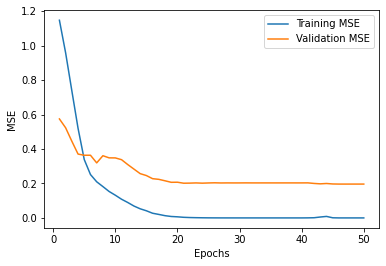

In [17]:
#Plot MSE vs Epochs
x = np.arange(1, max_epochs)
plt.plot(x, mse, label='Training MSE')
plt.plot(x, val_mse, label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

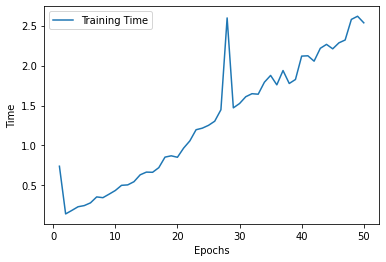

In [18]:
#Plot Training Time vs Epochs
plt.plot(x, time_list2, label='Training Time')
plt.xlabel('Epochs')
plt.ylabel('Time')
plt.legend()
plt.show()